## Imputing NULL values

Questions:
- keep notebook blank or ask guiding questions to solve problem? 

### Problem Description:

We have dataset about cars which has information about different cars and their attributes. We want to use this dataset to give a prospective buyer suggestion about buying a car. Before that , we want to check if the data present doesnt have any blank/null values. 

In the dataset, we focus specifically on the `acceleration` column. Check if there exists any null/missing values in the `acceleration` data . If there is, try to impute those missing values with measures that seem appropriate in this case.












**[only give the problem statement and let the students ccpme up with the solution]**

In [22]:
import pandas as pd
cardata=pd.read_csv("../datasets/mpg-nulls.csv")
cardata

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,0.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,0.0,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### What are the null values in `price`?

In [23]:
cardata['acceleration'].isnull().sum()

0

### Set 0's as nulls

In [24]:
num_missing = (cardata['acceleration']== 0).sum()
print(num_missing)

100


In [25]:
import numpy as np
cardata['acceleration']=cardata['acceleration'].replace(0, np.nan)

### Check for nulls after modifying

In [26]:
cardata['acceleration'].isnull().sum()

100

### Check for the NULL values

In [29]:
cardata.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,NaN,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,NaN,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,NaN,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


### Look at distribution with null values

array([[<AxesSubplot:title={'center':'acceleration'}>]], dtype=object)

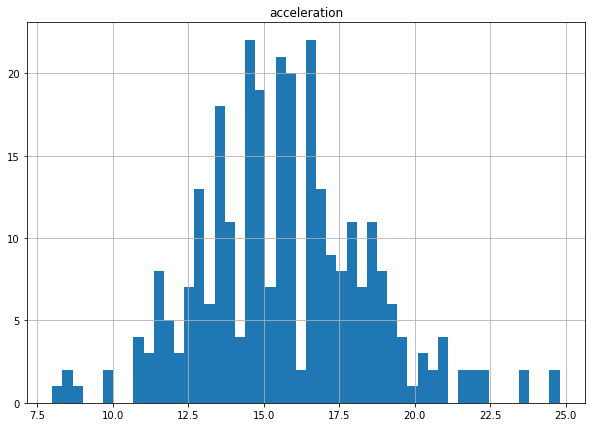

In [30]:
cardata.hist(column='acceleration',bins=50,figsize=(10,7))

### Fill Null's based on distribution

In [31]:
cardata['acceleration'].fillna(cardata['acceleration'].mean(), inplace=True)
cardata.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.000000,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.500000,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,15.718456,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.000000,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,15.718456,70,1,ford torino
5,15.0,8,429.0,198,4341,10.000000,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.000000,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.500000,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,15.718456,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.500000,70,1,amc ambassador dpl


### Check if null persists

In [32]:
cardata['acceleration'].isnull().sum()

0

### Look at the new distribution

In [33]:
cardata['acceleration'].describe()

count    398.000000
mean      15.718456
std        2.407424
min        8.000000
25%       14.500000
50%       15.718456
75%       16.675000
max       24.800000
Name: acceleration, dtype: float64

## Scratch work

### Load the dataset: (winedata)


In [34]:
import pandas as pd

wine=pd.read_csv("../datasets/winedata2.csv")
wine

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,94.0
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,92.0
2,US,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,100.0
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,94.0
4,France,La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,94.0
...,...,...,...,...,...,...,...,...,...,...
1994,US,Schatz Family Reserve,90.0,60.0,California,Lodi,Central Valley,Cabernet Sauvignon,Peltier,100.0
1995,Germany,Cuvée Noir,90.0,21.0,Pfalz,NaN,NaN,Red Blend,Pflüger,97.0
1996,Germany,Hattenheimer Schützenhaus Kabinett Trocken,90.0,25.0,Rheingau,NaN,NaN,Riesling,Weingut Hans Bausch,90.0
1997,US,NaN,90.0,18.0,California,El Dorado,Sierra Foothills,Barbera,Boeger,82.0


In [35]:
nulls= wine['price'].isnull()
nulls

0       False
1       False
2       False
3       False
4       False
        ...  
1994    False
1995    False
1996    False
1997    False
1998    False
Name: price, Length: 1999, dtype: bool

In [36]:
null_price= wine[wine['price'].isnull()]
null_price

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
32,Italy,Vigna Piaggia,90.0,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga,89.0
56,France,Le Pavé,90.0,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron,80.0
72,Italy,Bussia Riserva,91.0,NaN,Piedmont,Barolo,NaN,Nebbiolo,Silvano Bolmida,90.0
82,Italy,Palliano Riserva,91.0,NaN,Piedmont,Roero,NaN,Nebbiolo,Ceste,92.0
116,Spain,Dulce Tinto,86.0,NaN,Levante,Jumilla,NaN,Monastrell,Casa de la Ermita,88.0
...,...,...,...,...,...,...,...,...,...,...
1918,Portugal,Casa de Santar,90.0,NaN,Dão,NaN,NaN,Portuguese Red,Dão Sul,96.0
1919,Portugal,Casa de Santar Reserva Branco,90.0,NaN,Dão,NaN,NaN,Portuguese White,Dão Sul,92.0
1937,France,Cuvée Gladiateur,88.0,NaN,Rhône Valley,Costières de Nîmes,NaN,Rosé,Domaine du Vistre,95.0
1966,France,Marie de Beauregard,88.0,NaN,Loire Valley,Chinon,NaN,Cabernet Franc,Saget la Perrière,89.0


In [37]:
wine['price'].describe()

count    1897.000000
mean       38.183975
std        28.955232
min         4.000000
25%        20.000000
50%        30.000000
75%        48.000000
max       500.000000
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

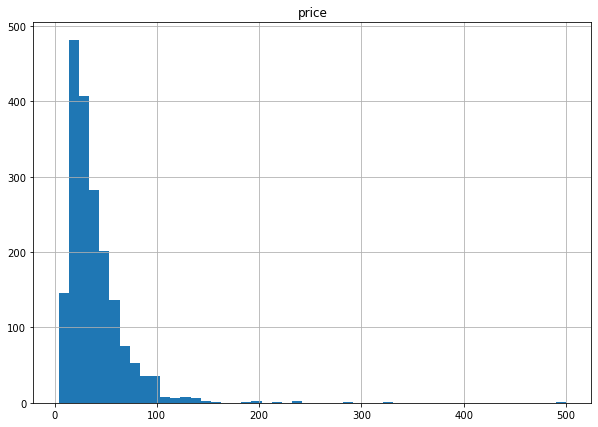

In [38]:
wine.hist(column='price',bins=50,figsize=(10,7))

In [39]:
wine['price'].fillna(wine['price'].median(), inplace=True)
#wine.head(5)

In [40]:
wine['price'].isnull().sum()

0

In [41]:
wine['price'].head(5)

0    235.0
1    110.0
2     90.0
3     65.0
4     66.0
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

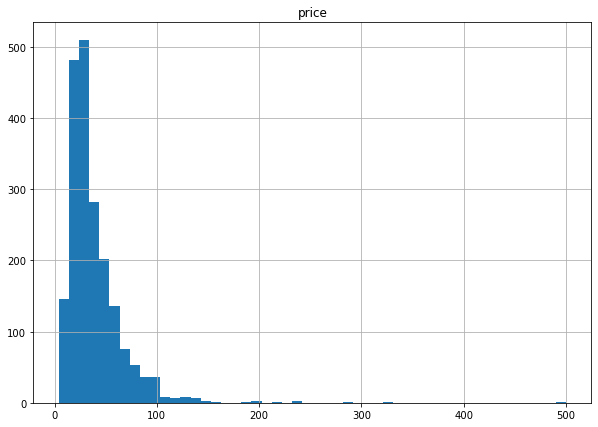

In [42]:
wine.hist(column='price',bins=50,figsize=(10,7))

## Imputing NULL values in cardata

### Add detailed problem description